<div style="display: flex; justify-content: center;">
  <a href="https://www.univ-nantes.fr/"><img src="nantes.png" alt="Nantes" width="300" height="250"></a>
  <a href="https://www.ubuea.cm/index.php/faculties-schools/college-of-technology-cot/"><img src="cot.jpeg" alt="COT" width="150" height="150"></a>
  <a href="https://iut-sn.univ-nantes.fr/"><img src="iutnantes.png" alt="IUT_Nantes" width="150" height="150"></a>
   <a href="https://www.univ-dschang.org/"><img src="uds.png" alt="UDS" width="150" height="150"></a> 
 <a href="https://www.cnrs.fr/fr"><img src="cnrs.jpeg" alt="CNRS" width="150" height="150"></a>
  <a href="https://polytech.univ-nantes.fr/"><img src="polytech.png" alt="Polytech" width="250" height="150"></a>
  <a href="https://www.ubuea.cm/"><img src="ub.jpeg" alt="UB" width="150" height="150"></a>
    <a href="https://gem.ec-nantes.fr/"><img src="gem.png" alt="GEM" width="150" height="150"></a> 
<a href="https://www.ec-nantes.fr/"><img src="central.png" alt="Central" width="150" height="150"></a> 
  <a href="https://www.univ-dschang.org/iutfv-bandjoun/"><img src="iutfv.png" alt="IUT-FV" width="150" height="150"></a>
    by #TKA
</div>

<h1 align="center">Journées IA et Matériaux de Construction</h1>

## Part 3: Machine Learning pour la Prédiction de la résistance à la compression du béton

### Introduction
<p style="text-align: justify;">
Dans ce jupyter notebook, nous allons explorer le jeu de données traite dans le lab precedent</p>
<p style="text-align: justify;">
Notre objectif principal dans ce jupyter notebook est de modélisation de la résistance du béton à haute performance à l'aide de l'apprentissage automatique (Machine Learning)</p>

### Sommaire du Jupyter Notebook
##### 1. Modelisation du jeu de données
##### 2. Regression Lineaire
##### 3. Abre à Decision
##### 4. Conclusion
##### Exercice de recherche

In [61]:
print(os.getcwd())

NameError: name 'os' is not defined

In [22]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

##### 1. Modelisation du jeu de données


In [11]:
# Importation et lecture du dataset
beton=pd.read_csv('Concrete_clean')

In [12]:
# Afficher l'en-tête du dataset
beton.head(10)

Cement  Blast Furnace Slag  Fly Ash     Water  Superplasticizer  \
0  6.293419            0.000000      0.0  5.093750          1.252763   
1  6.293419            0.000000      0.0  5.093750          1.252763   
2  5.809643            4.966335      0.0  5.433722          0.000000   
3  5.809643            4.966335      0.0  5.433722          0.000000   
4  5.296315            4.893352      0.0  5.262690          0.000000   
5  5.587249            4.744932      0.0  5.433722          0.000000   
6  5.942799            4.564348      0.0  5.433722          0.000000   
7  5.942799            4.564348      0.0  5.433722          0.000000   
8  5.587249            4.744932      0.0  5.433722          0.000000   
9  6.165418            0.000000      0.0  5.433722          0.000000   

   Coarse Aggregate  Fine Aggregate  Age (day)  Concrete compressive strength  
0          6.947937        6.517671   3.367296                      79.986111  
1          6.962243        6.517671   3.367296                      61.887366  
2          6.838405        6.388561   5.602119                      40.269535  
3          6.838405        6.388561   5.902633                      41.052780  
4          6.886940        6.717200   5.888878                      44.296075  
5          6.838405        6.508769   4.510860                      47.029847  
6          6.838405        6.388561   5.902633                      43.698299  
7          6.838405        6.388561   3.367296                      36.447770  
8          6.838405        6.508769   3.367296                      45.854291  
9          6.838405        6.388561   3.367296                      39.289790

In [13]:
# Divisons le dataset en variable cible et variables independantes
X = beton.iloc[:, :-1] #variables independantes
y = beton.iloc[:, -1] # variable dependante ou variable cible

In [14]:
#Division de l'ensemble de données en deux ensembles : l'ensemble de formation et l'ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [15]:
#mise à l'échelle des donnees
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [16]:
#Quetion: Quelle est l'importance de la mise à l'échelle des donnees? 

#### 2. Regression Lineaire
Création d'un modèle (regréssion lineaire)
Nous allons maintenant essayer d'expliquer la variable y en fonction des variables x.

Le modèle est de la forme : 𝑦=𝐴∗𝑥+𝑏. Où les coefficients du vecteur A seront ceux qui "expliquent" le mieux les données.

In [17]:
##création et entrainement du modèle
lr = LinearRegression()
lr.fit(X_train, y_train)# Training

LinearRegression()

In [18]:
lr.score(X_train, y_train)# Score d'entrainement

0.8033317528196342

In [19]:
lr.score(X_test, y_test)# Score de test

0.7998650894385508

In [20]:
#coefficients du modèle
lr.coef_ #contenu du vecteur A

array([ 8.78403259,  5.27097187,  0.5248272 , -4.6875858 ,  2.88414659,
       -0.12563376, -1.36065116,  9.95205929])

In [46]:
#prediction sur les données d'entrainement
prediction_train=lr.predict(X_train)
erreur_train=mean_squared_error(y_train,prediction_train)
print('erreur_entrainement:',erreur_train)

erreur_entrainement: 52.711031815483096


In [38]:
# Mettre le code pour evaluer le modele sur les données de test


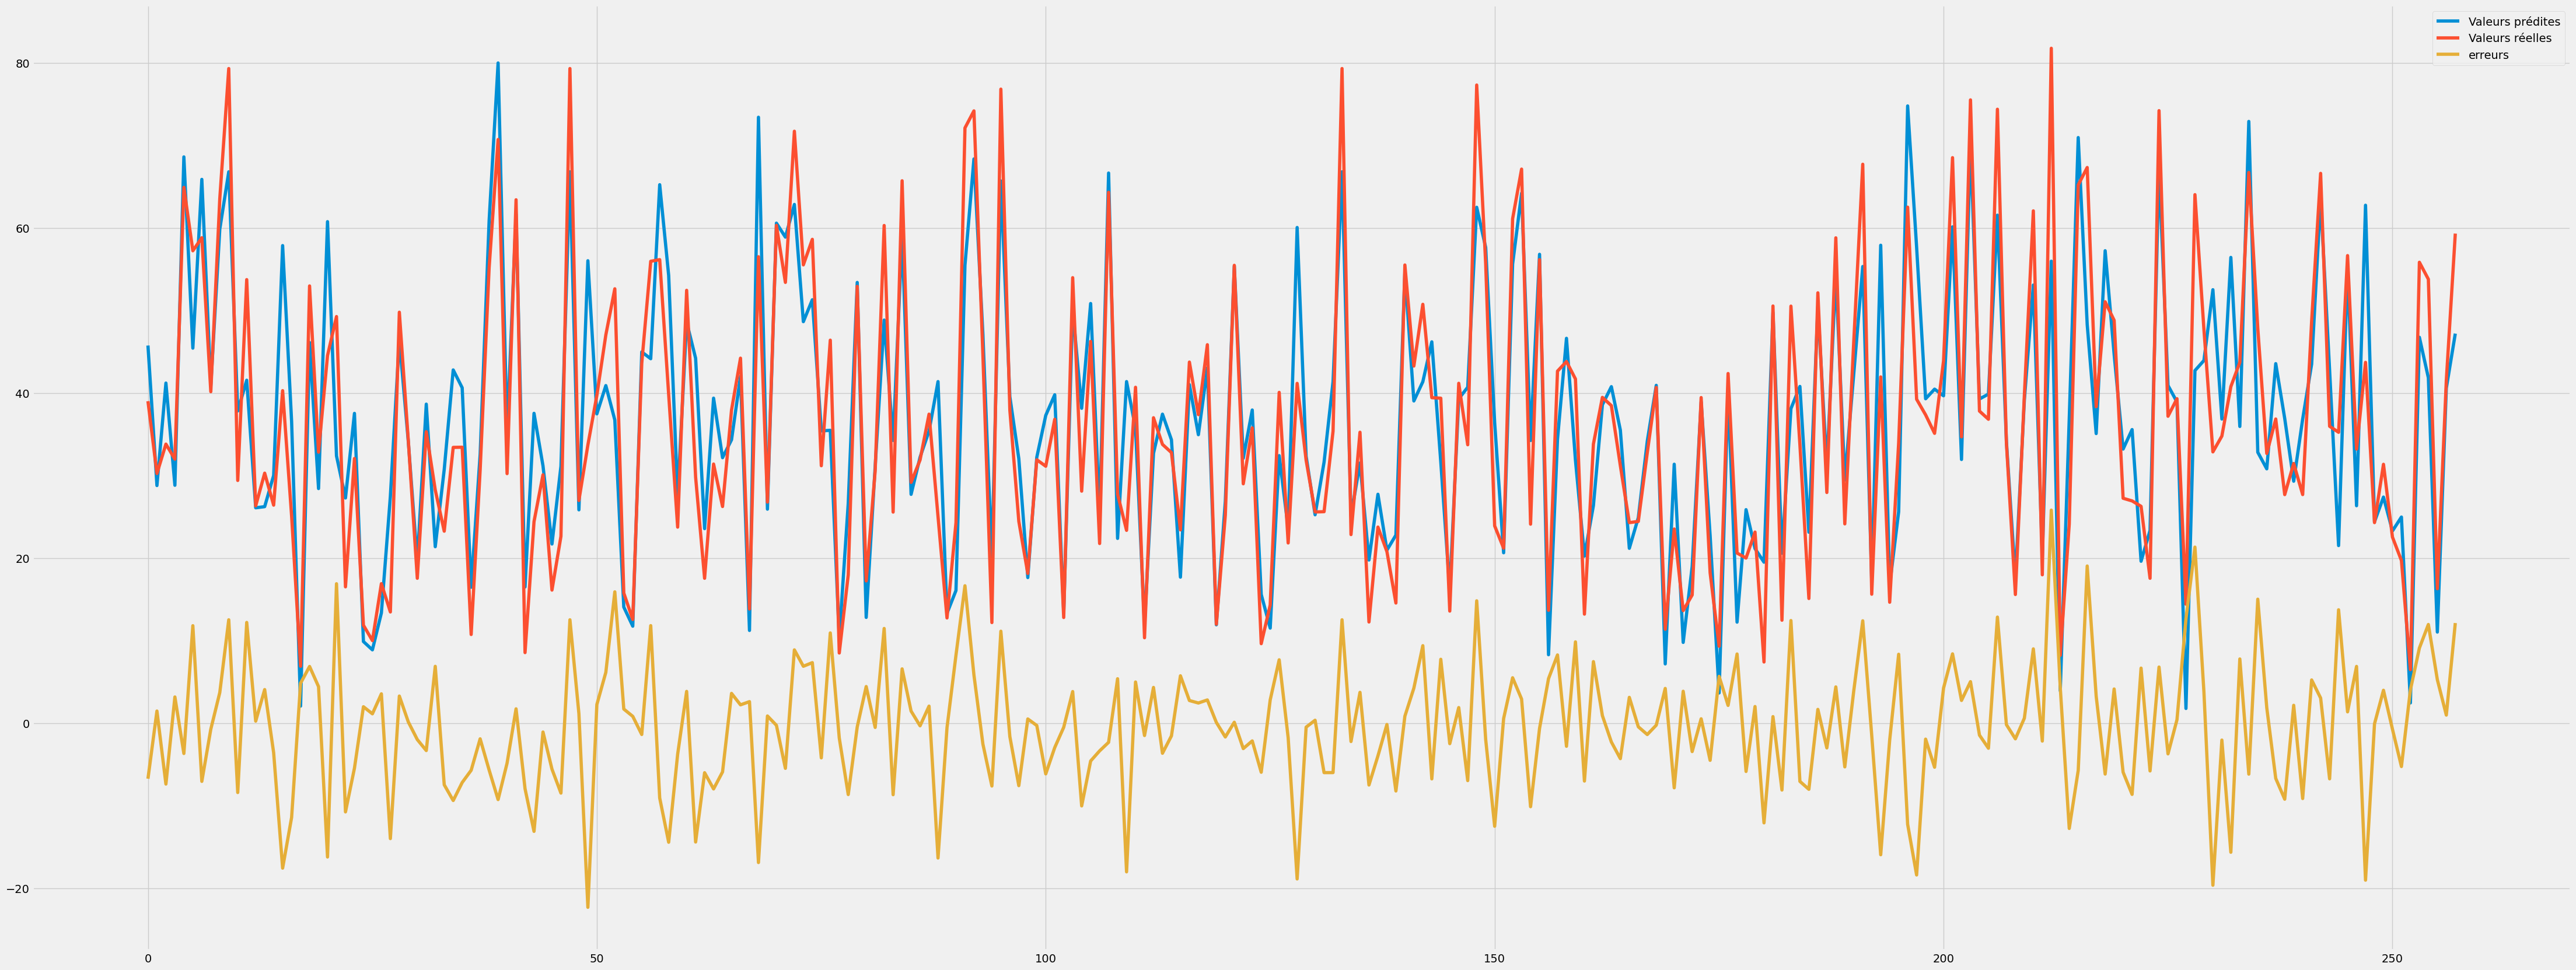

In [44]:
# clacul de l'erreur de prediction et affichage
erreurs=y_test-prediction_test
Data_test = np.zeros((len(y_test),1))
Data_test[:,0]=y_test
Data_erreur= np.zeros((len(erreurs),1))
Data_erreur[:,0]=erreurs
plt.figure(figsize=(50,20))
plt.plot(prediction_test,label='Valeurs prédites');
plt.plot(Data_test,label='Valeurs réelles');
plt.plot(Data_erreur,label='erreurs');
plt.legend()

In [ ]:
# Conclure

#### 3. Abre à Decision

In [52]:
# choix du modele
dtr = DecisionTreeRegressor()


In [53]:
# Mettre le code pour entrainer le modele


In [54]:
 #Mettre le code pour evaluer le modele
    

In [55]:
# Mettre le code calculer l'erreur de prediction


In [56]:
# mettre le code clacul de l'erreur de prediction et affichage


In [57]:
# mettre le code pour afficher la courbe d'erreur


In [58]:
# mettre le code pour afficher à la fois la courbe d'erreur la valeur réelle et la valeur predite


In [59]:
# comparer la regression lineaire et l'arbre de decision et Conclure



##### Exercice de recherche

In [60]:
# donner le code pour reprendre ces predictions en choisissant une variable autre à predire que la résistance du béton